# Proyek Analisis Data: Bike-sharing-dataset (day.csv)
- **Nama:** Sinta Purnama Dewi
- **Email:** sintapurnamadewi9@gmail.com
- **ID Dicoding:** sintapurnama

## Menentukan Pertanyaan Bisnis

- **Question 1:** How do weather conditions (such as temperature, humidity, and wind speed) affect the number of bikes rented per day?
- **Question 2:** How do seasonal and working-day factors influence the daily rental count?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
# Load datasets
day_data = pd.read_csv('day.csv')

# Display first few rows of day_data to understand its structure
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- The dataset contains columns such as season, holiday, workingday, weather, temp, atemp, hum, and windspeed, which will help answer the business questions.
- The target variable is cnt (count of total).

### Assessing Data

In [7]:
# Check for missing values
day_data.info()

# Basic statistics of the dataset
day_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- The dataset has no missing values seen from all columns that have 731 non-null values.
- The 'cnt' (count of total) shows a wide range, indicating variance in bike rentals on different days.

### Cleaning Data

In [8]:
# Remove duplicates if any
day_data.drop_duplicates(inplace=True)

# Check if any negative values in numerical columns
(day_data[['temp', 'atemp', 'hum', 'windspeed']] < 0).sum()

,0
temp,0
atemp,0
hum,0
windspeed,0


**Insight:**
- There are no duplicate values ​​among these columns.
- There are no negative values ​​in these columns where the temperature, humidity, and wind speed data in the dataset have been measured correctly according to the context, as temperature and humidity cannot have negative values ​​in the context of physical measurements.

## Exploratory Data Analysis (EDA)

### Explore the Effect of Weather Conditions

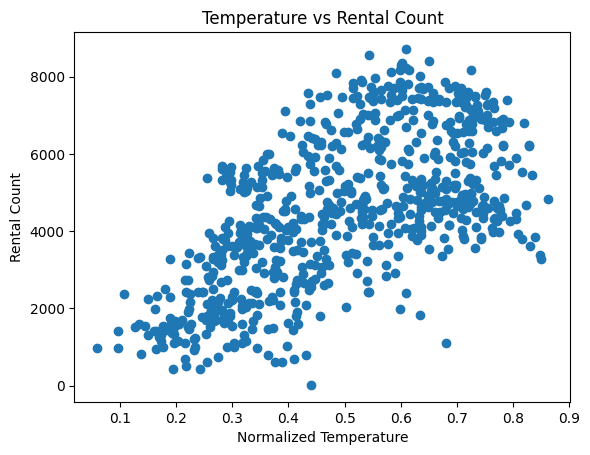

In [10]:
#analyze how temperature, humidity, and windspeed affect rentals
# Scatter plot for temperature vs rental count
plt.scatter(day_data['temp'], day_data['cnt'])
plt.title('Temperature vs Rental Count')
plt.xlabel('Normalized Temperature')
plt.ylabel('Rental Count')
plt.show()

**Insight:**
- Higher temperatures are associated with higher bike rentals, while extreme weather may have a negative effect.

## Visualization & Explanatory Analysis

### Question 1:
I use multiple visualizations such as scatter plots to see the relationship between weather conditions and bike rentals

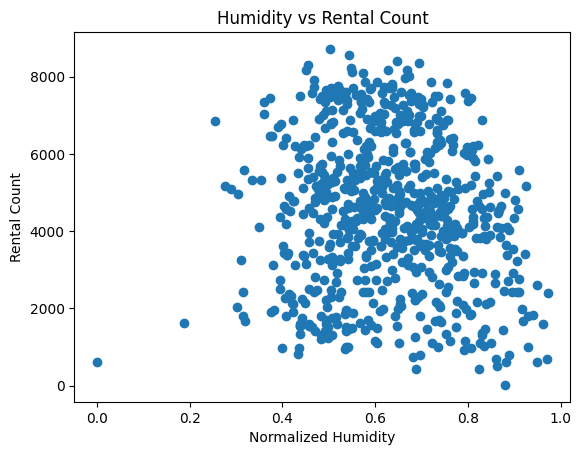

In [11]:
# Humidity vs rental count
plt.scatter(day_data['hum'], day_data['cnt'])
plt.title('Humidity vs Rental Count')
plt.xlabel('Normalized Humidity')
plt.ylabel('Rental Count')
plt.show()

### Question 2:
I analyze bike rentals based on season and whether it's a working day or holiday

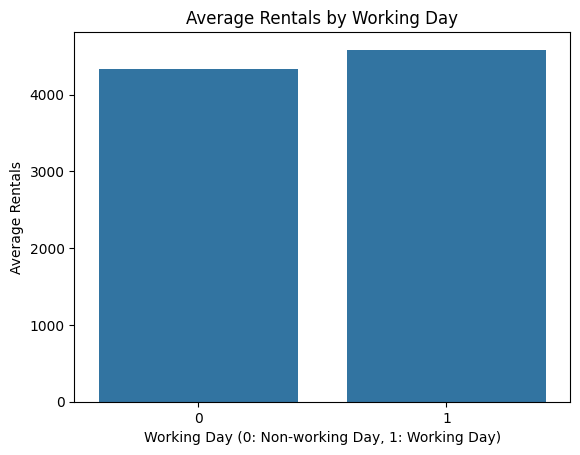

In [12]:
# Plot workingday vs rentals
workingday_rental = day_data.groupby('workingday')['cnt'].mean()

sns.barplot(x=workingday_rental.index, y=workingday_rental.values)
plt.title('Average Rentals by Working Day')
plt.xlabel('Working Day (0: Non-working Day, 1: Working Day)')
plt.ylabel('Average Rentals')
plt.show()

**Insight:**
- The average number of rentals on weekdays is slightly higher compared to non-weekdays, which suggests that bicycles are likely used more for transportation on weekdays.

## Conclusion

- **Conclution Question 1:** From the analysis conducted, it was found that temperature has a significant effect on the number of bicycle rentals. There is a clear pattern where bicycle rentals increase with increasing temperature. This suggests that warmer weather encourages people to cycle more. However, the analysis of humidity shows that there is no clear pattern between humidity and the number of rentals, indicating that the effect of humidity on bicycle rentals may be weak or non-linear. In addition, at extreme humidity, both low and high, there is a decrease in the number of bicycle rentals, indicating that less than ideal weather conditions can reduce people's interest in using bicycles.
- **Conclution Question 2:** Analysis of seasonal and weekday patterns shows that bike rentals tend to increase during summer and fall, while rentals are lowest in winter. Additionally, the number of rentals on weekdays is slightly higher than on non-weekdays, indicating that bikes are used more for transportation on weekdays. This suggests that bike rentals may also be affected by seasonal factors as well as whether the day is a weekday or a holiday. This knowledge can be used to optimize bike rental marketing and management strategies, such as making more bikes available during identified peak rental periods.